In [1]:
from os import listdir
from numpy import asarray
from numpy import save

##from matplotlib import pyplot
from matplotlib.image import imread
from PIL import Image
import IPython.display as display

import tensorflow as tf

import matplotlib.pyplot as plt
import math
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68608000/68606236 [==============================] - 0s 0us/step


In [0]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [0]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [0]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [6]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("---")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
---
Total training images: 2000
Total validation images: 1000


In [0]:
### INISIALISASI

batch_size = 128
epochs = 10
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [54]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [55]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


In [0]:
sample_training_images, _ = next(train_data_gen)

In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis()
        #plt.subplots_adjust(wspace=.5, hspace=.5)
        #ax.set_title(col)
    #plt.tight_layout()
    #plt.subplots_adjust(wspace=.5, hspace=.5)
    plt.show()

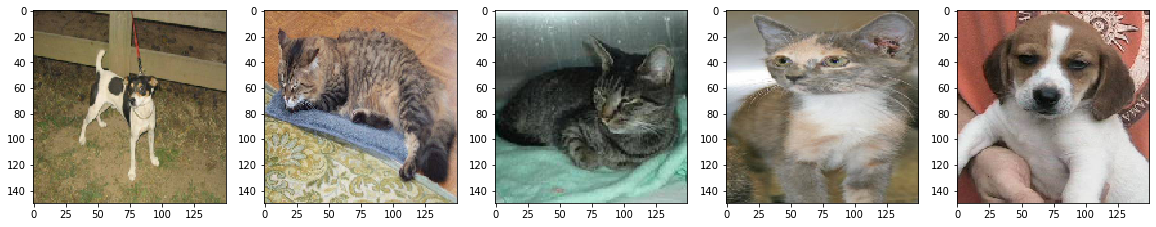

In [58]:
plotImages(sample_training_images[:5])

In [59]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 20736)            

In [0]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [61]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/10
15/15 [==============================] - 8s 514ms/step - loss: 1.0072 - acc: 0.4728 - val_loss: 0.7476 - val_acc: 0.5056
Epoch 2/10
15/15 [==============================] - 7s 498ms/step - loss: 0.6874 - acc: 0.5396 - val_loss: 0.6748 - val_acc: 0.5379
Epoch 3/10
15/15 [==============================] - 8s 505ms/step - loss: 0.6666 - acc: 0.5876 - val_loss: 0.6401 - val_acc: 0.6429
Epoch 4/10
15/15 [==============================] - 7s 484ms/step - loss: 0.5972 - acc: 0.7138 - val_loss: 0.5903 - val_acc: 0.6708
Epoch 5/10
15/15 [==============================] - 7s 483ms/step - loss: 0.5695 - acc: 0.7089 - val_loss: 0.6311 - val_acc: 0.6473
Epoch 6/10
15/15 [==============================] - 7s 488ms/step - loss: 0.5377 - acc: 0.7372 - val_loss: 0.5839 - val_acc: 0.6998
Epoch 7/10
15/15 [==============================] - 7s 465ms/step - loss: 0.4627 - acc: 0.7873 - val_loss: 0.5859 - val_acc: 0.7065
Epoch 8/10
15/15 [==============================] - 7s 450ms/step - loss: 0.

Visualize training results

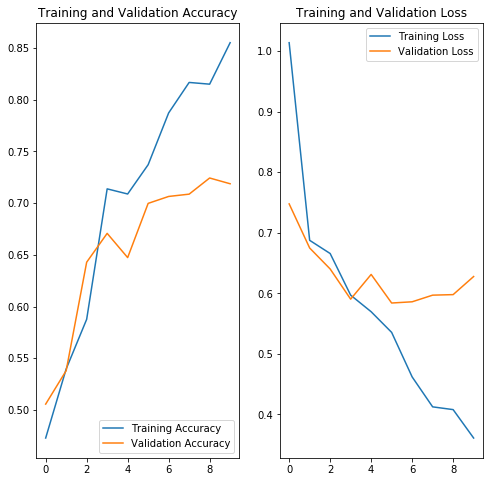

In [64]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()